# Plot PACF e ACF sulla serie temporali
Iniziamo ad assaggiare la PACF e la ACF attraverso i loro plot

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

## PACF

Iniziamo a valutare l'autoregressione di alcune serie

In [11]:
x0 = np.random.randn(1000)

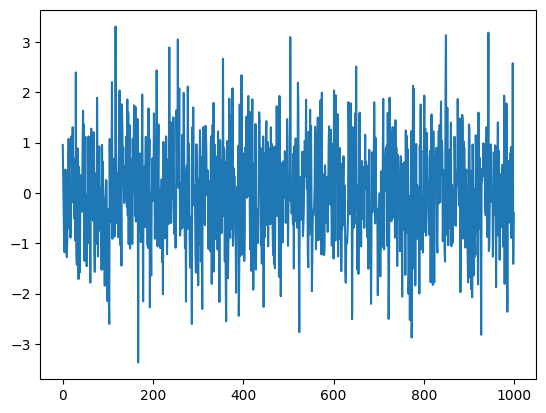

In [13]:
plt.plot(x0);

#### Plot PACF

Andiamo ad analizzare il comportamento autoregressivo della serie, valutando dunque la PACF.
Analizzando i risultati, possiamo notare alcune cose. La prima, è che abbiamo una PACF = 1 con lag 0. Ogni punto è autocorrelato con sè stesso. Può capitare anche che alcuni valori successivi siano effettivamente autocorrelati fuori dagli intervalli di confidenza. Siccome sono vicini alle soglie e, appunto l'intervallo di confidenza ammette il 5% di errore casuale, non li includiamo di certo nella P.
In questo caso p=0: non esiste nessun valore che effettivamente aiuta a predire il prossimo

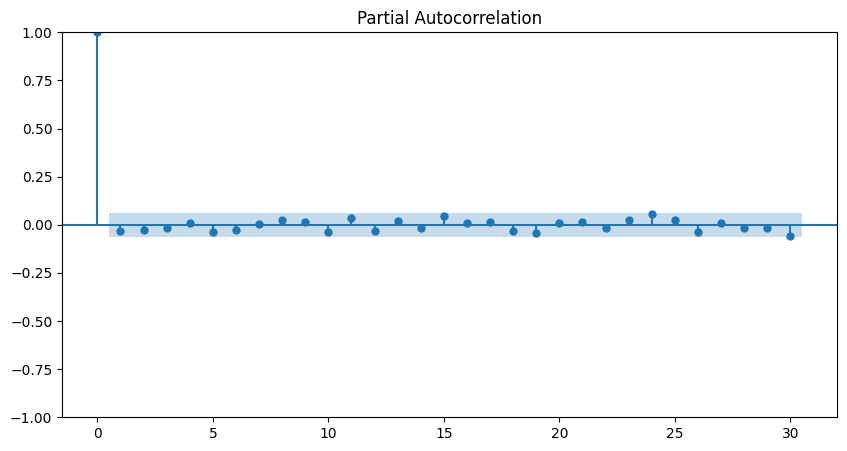

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x0, ax);

### Random Walk
Generiamo un random walk per verificare che effettivamente il valore precedente serve per il successivo.
La serie si calcola come metà del valore precedente più random noise gaussiano con deviazione standard 0.1

In [19]:
x1 = [0]
for i in range (1000):
    x = 0.5 * x1[-1] + 0.1*np.random.randn()
    x1.append(x)
x1 = np.array(x1)

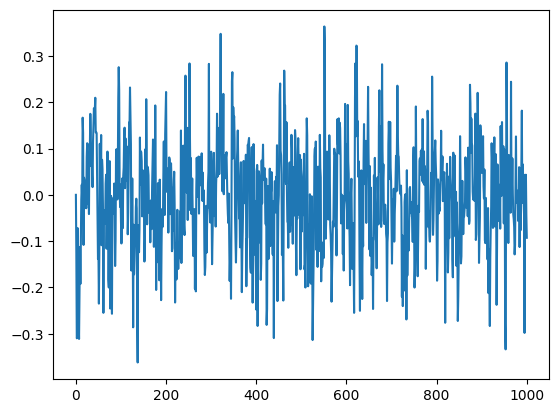

In [20]:
plt.plot(x1)

#### Plot PACF

Andiamo ad analizzare il comportamento autoregressivo della serie, valutando dunque la PACF.
Qui abbiamo la magia. Vedendo il plot sopra (della serie creata), non sappiamo effettivamente se c'è un valore che determina il successivo. Tuttavia, il nostro PACF, ci dimostra come il valore precedente (p=1) effettivamente autocorrela (guardacaso a 0.5) con quello successivo!

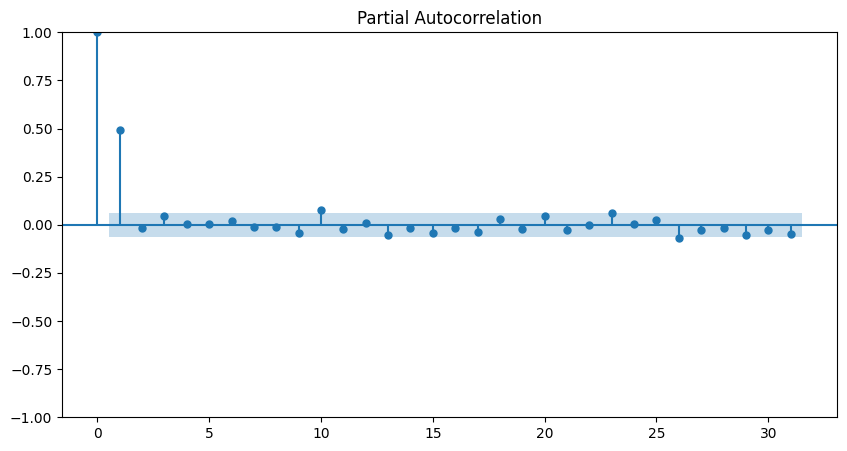

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x1, ax);

In [22]:
# Ora facciamo la stessa cosa, ma con il coefficiente di -0.5!
x1 = [0]
for i in range (1000):
    x = -0.5 * x1[-1] + 0.1*np.random.randn()
    x1.append(x)
x1 = np.array(x1)

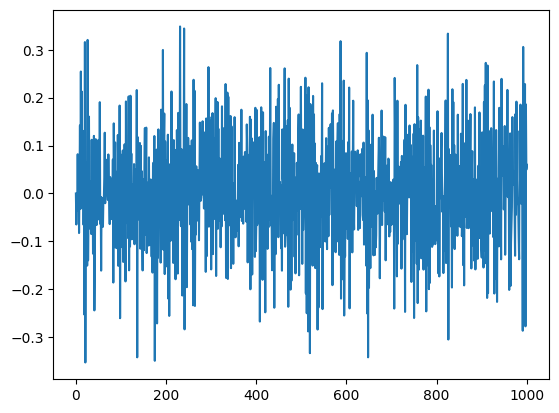

In [24]:
# Sembra uguale a prima
plt.plot(x1)

#### Plot PACF

Questo plot PACF ci fa vedere l'effettiva differenza. Ora abbiamo un segno - sul valore precedente, quindi ci aspettiamo un'autocorrelazione negativa. Ed infatti abbiamo questo risultato nel plot sotto!!

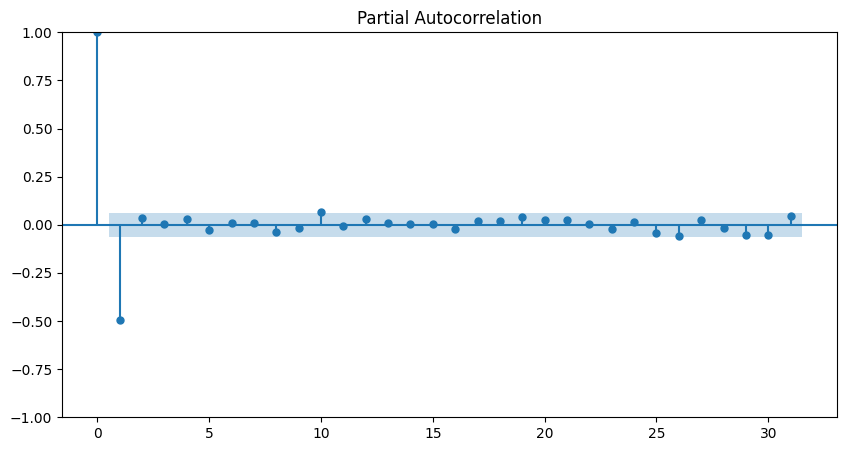

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x1, ax);

### Funzioni autoregressive generiche

Ora vediamo cosa succede ad una serie temporale dove c'è una relazione tra il valore corrente e i due precedenti. Per giunta, usiamo anche due coefficienti diversi: 0.5 per l'ultimo valore e -0.3 per il penultimo

In [27]:
x2 = [0,0]
for i in range(1000):
    x = 0.5*x2[-1] -0.3*x2[-2] + 0.1*np.random.randn()
    x2.append(x)

x2 = np.array(x2)

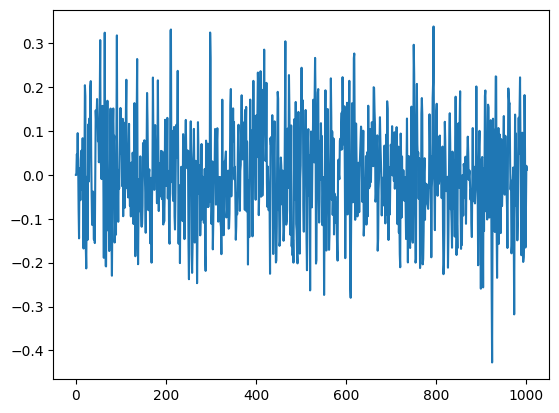

In [28]:
plt.plot(x2)

#### Plot PACF

Vediamo le differenze con l'altro plot. Abbiamo un AR(2) process, infatti troviamo p=2.
Altra differenza è che questa volta i coefficienti non rispettano il valore impostato, soprattutto per il penultimo valore. Questo perchè ogni valore effettivamente viene influenzato sia dal precedente che da quello distante 2. Il nuovo valore predetto sarà dunque il penultimo per il successivo, dunque l'autocorrelazione viene modificata dal secondo valore.

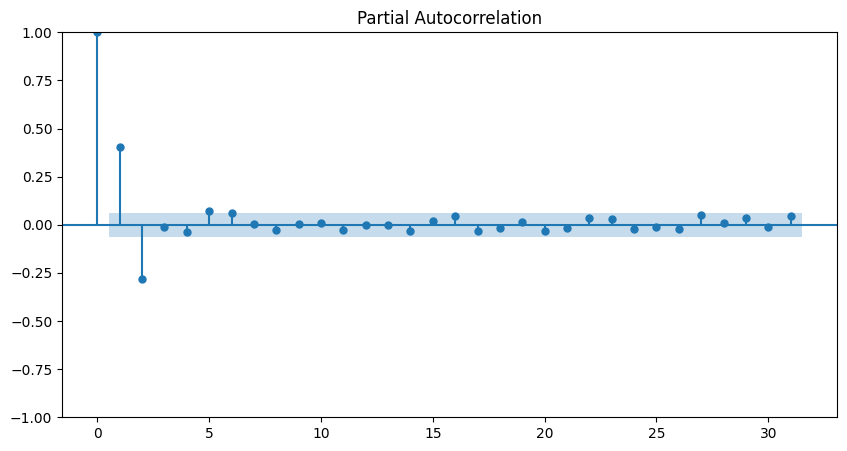

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x2, ax);

### Processo AR(5) con buchi in mezzo

Ora creiamo un modello autoregressivo a 5 valori, però consideriamo di inserire i coefficienti solo a 1, 2 e 5.
Vediamo se il PACF funziona

In [33]:
x3 = [0,0,0,0,0]
for i in range(1000):
    x = 0.5*x3[-1] -0.3*x3[-2] - 0.6*x3[-5] + 0.1*np.random.randn()
    x3.append(x)

x3 = np.array(x3)

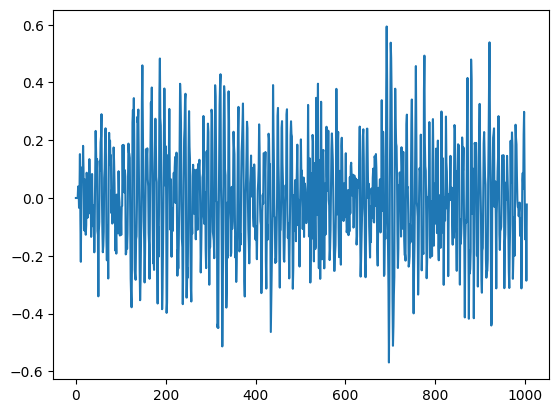

In [34]:
plt.plot(x3)

#### Plot PACF

Qui abbiamo le prime sostanziali differenze!!
Il plot sopra, a differenza degli altri modelli, sembra comportarsi in maniera diversa: non è più rumore generico, sembra quasi il plot di un'onda sonora. Sembra avere "cluster di volatilità".

Il PACF, invece, mostra una cosa particolare. Anche se non abbiamo correlazione tra il terzo e quarto valore nel nostro modello, essi diventano non zero. Il tre, in particolare, sembra influire di meno e sembra quello più vicino allo zero (può anche capitare che sia 0).

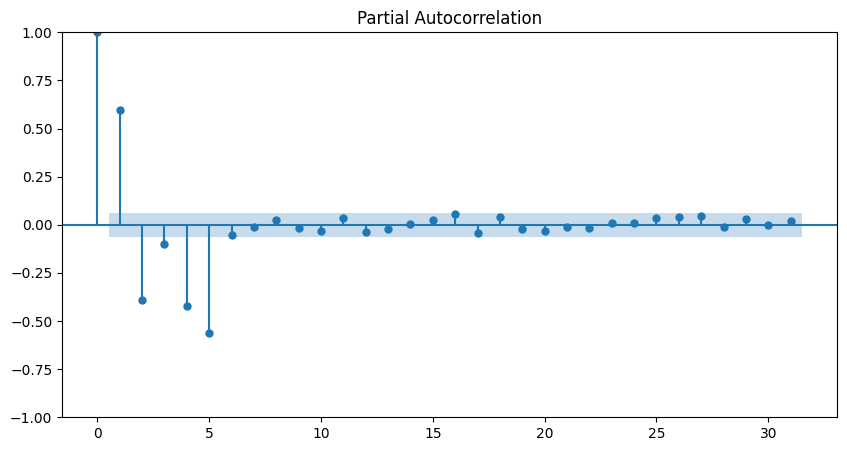

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x3, ax);

## ACF

Ora proviamo ad applicare il MA su alcuni modelli. Useremo in parte quelli calcolati prima

#### Plot ACF

Prendendo del gaussian noise, sappiamo che non esiste alcuna autocorrelazione tra i valori

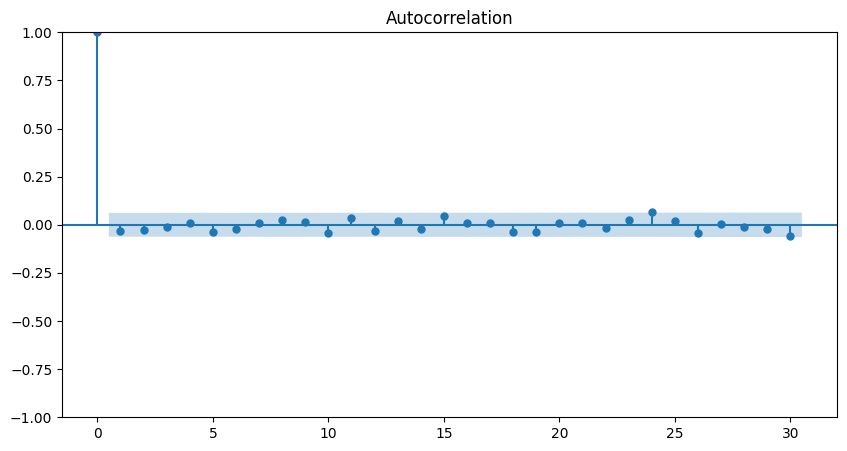

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(x0, ax);

### MA(1)

Generiamo un processo MA(1).
Come recall, sappiamo che dobbiamo generare del rumore casuale che andremo a sommare con determinati coefficienti. A differenza dell'AR model, dove effettivamente abbiamo il valore successivo che dipende dal precedente con una formula, qui abbiamo la somma di componenti

In [37]:
errors = np.random.randn(1000)
ma1 = [errors[0]]
for i in range(1, 1000):
    x = 0.5*errors[i-1] + errors[i]
    ma1.append(x)

ma1 = np.array(ma1)


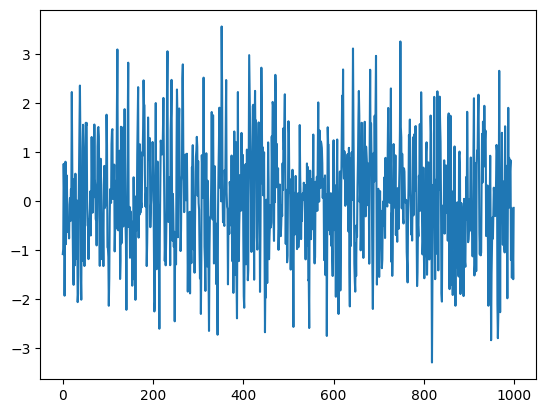

In [38]:
plt.plot(ma1)

#### Plot ACF

Giustamente, per come lo abbiamo generato, abbiamo effettivamente il nostro plot di autocorrelazione.

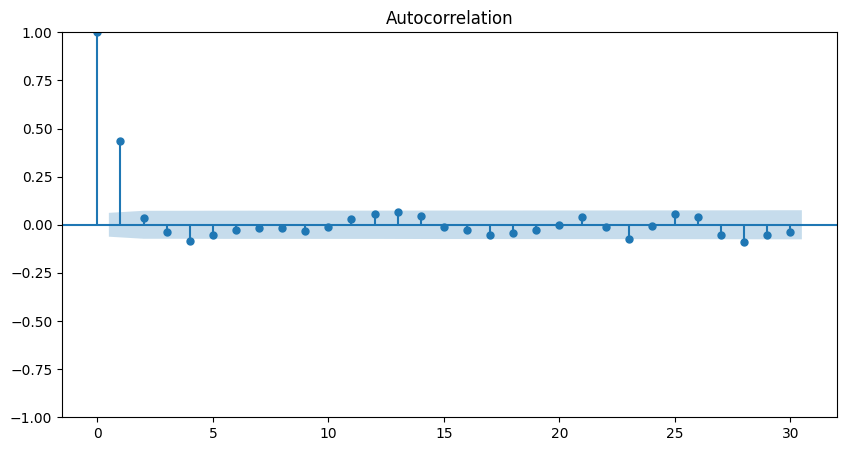

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma1, ax);

In [41]:
errors = np.random.randn(1000)
ma2 = [errors[0], errors[1]]
for i in range(2, 1000):
    x = 0.5*errors[i-1] -0.3*errors[i-2] + errors[i]
    ma2.append(x)

ma2 = np.array(ma2)


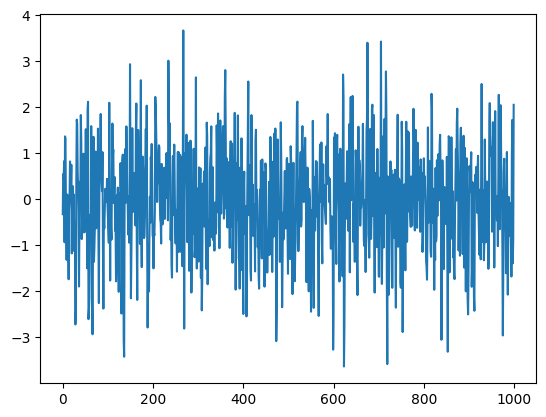

In [42]:
plt.plot(ma2)

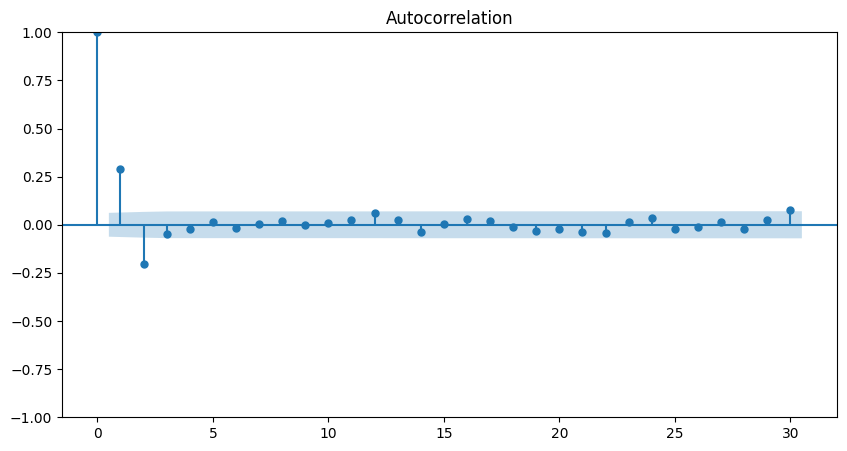

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma2, ax);